In [1]:
from google.colab import drive
drive.mount("/gdrive")
import sys
sys.path.append("/gdrive/MyDrive/Colab Notebooks/Parvin/datasets/")

Mounted at /gdrive


## Importing necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

## Loading Urban dataset

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
df = pd.read_excel("/gdrive/MyDrive/Colab Notebooks/Parvin/datasets/UrbanDataSet.xlsx")
df.describe()
# Looks like some features have noise data (RxSpeed[m/s], TxSpeed[m/s], distance[m], ...)

,TxPosX[m],TxPosY[m],RxPosX[m],RxPosY[m],SNR[dB],Pathloss[dB],frequency[Ghz],distance[m],TxSpeed[m/s],RxSpeed[m/s]
count,64000.00,64000.00,64000.00,64000.00,64000.00,64000.00,64000.00,64000.00,64000.00,64000.00
mean,209.08,292.65,250.00,166.63,25.87,111.68,32.28,144.17,101.33,58.11
std,68.54,143.98,0.00,96.23,19.46,17.64,1.06,70.28,2705.23,1836.00
min,16.50,1.00,250.00,0.00,-13.96,65.76,30.40,1.00,59.76,29.88
25%,183.13,167.24,250.00,83.31,4.27,99.98,31.44,83.93,59.76,29.88
50%,250.00,333.48,250.00,166.62,29.62,105.50,32.39,166.86,59.87,29.99
75%,250.00,433.00,250.00,249.94,39.64,134.21,33.12,201.18,60.12,30.02
max,250.00,433.00,250.00,333.25,78.98,137.91,33.89,253.91,176783.92,119970.00


First we should rename some columns

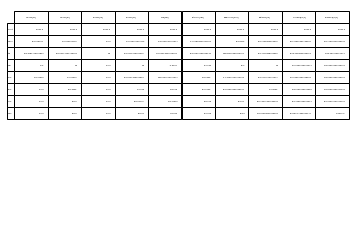

In [5]:
from pandas.plotting import table

desc = df.describe()

#create a subplot without frame
plot = plt.subplot(111, frame_on=False)

#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(plot, desc,loc='upper right')

#save the plot as a png file
plt.savefig('desc_plot.png')

In [6]:
df.rename(columns = {"RxSpeed[m/s]": "RxSpeed[km/h]", "TxSpeed[m/s]": "TxSpeed[km/h]"}, inplace = True)
df

,TxPosX[m],TxPosY[m],RxPosX[m],RxPosY[m],ChannelState,SNR[dB],Pathloss[dB],frequency[Ghz],distance[m],TxSpeed[km/h],RxSpeed[km/h]
0,250.00,1.00,250,0.00,LOS,78.10,65.76,30.40,1.00,59.86,30.00
1,250.00,1.17,250,0.08,LOS,77.42,66.34,30.40,1.08,59.86,30.00
2,250.00,1.33,250,0.17,LOS,74.24,66.87,30.40,1.17,59.86,30.00
3,250.00,1.50,250,0.25,LOS,75.90,67.37,30.40,1.25,59.86,30.00
4,250.00,1.67,250,0.33,LOS,72.88,67.84,30.40,1.33,59.86,30.00
...,...,...,...,...,...,...,...,...,...,...,...
63995,17.17,433.00,250,332.92,NLOS,-1.45,137.88,33.89,253.43,60.01,29.88
63996,17.00,433.00,250,333.00,NLOS,3.56,137.89,33.89,253.55,60.01,29.88
63997,16.83,433.00,250,333.08,NLOS,0.73,137.90,33.89,253.67,59.98,30.24
63998,16.67,433.00,250,333.17,NLOS,-1.16,137.90,33.89,253.79,60.01,29.88


*Checking* null values

In [7]:
df.isna().sum()

TxPosX[m]         0
TxPosY[m]         0
RxPosX[m]         0
RxPosY[m]         0
ChannelState      0
SNR[dB]           0
Pathloss[dB]      0
frequency[Ghz]    0
distance[m]       0
TxSpeed[km/h]     0
RxSpeed[km/h]     0
dtype: int64

*Ploting* RxSpeed[km/h]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


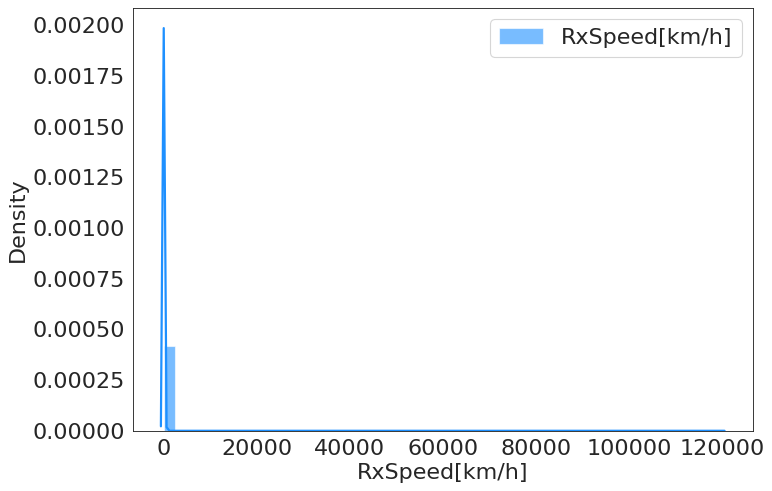

In [8]:
import seaborn as sns
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df["RxSpeed[km/h]"], color="dodgerblue", label="RxSpeed[km/h]", **kwargs)
plt.legend()

(array([6.3985e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5000e+01]),
 array([2.98800000e+01, 1.20238920e+04, 2.40179040e+04, 3.60119160e+04,
        4.80059280e+04, 5.99999400e+04, 7.19939520e+04, 8.39879640e+04,
        9.59819760e+04, 1.07975988e+05, 1.19970000e+05]),
 <a list of 10 Patch objects>)

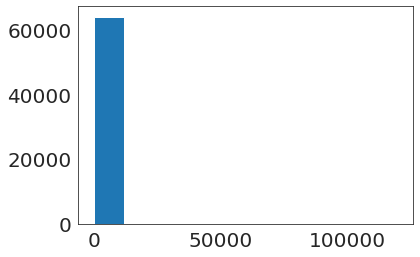

In [9]:
plt.hist(df["RxSpeed[km/h]"])

In [10]:
filt = df["RxSpeed[km/h]"] < 33
df[filt]["RxSpeed[km/h]"]

0       30.00
1       30.00
2       30.00
3       30.00
4       30.00
         ... 
63995   29.88
63996   29.88
63997   30.24
63998   29.88
63999   29.88
Name: RxSpeed[km/h], Length: 63985, dtype: float64

### Deleting noise data

In [11]:
df.drop(df[df["RxSpeed[km/h]"] > 110000].index, axis = 0, inplace = True)
df.describe()

,TxPosX[m],TxPosY[m],RxPosX[m],RxPosY[m],SNR[dB],Pathloss[dB],frequency[Ghz],distance[m],TxSpeed[km/h],RxSpeed[km/h]
count,63985.00,63985.00,63985.00,63985.00,63985.00,63985.00,63985.00,63985.00,63985.00,63985.00
mean,209.12,292.62,250.00,166.59,25.87,111.67,32.28,144.14,59.91,30.00
std,68.49,143.98,0.00,96.20,19.46,17.64,1.06,70.26,0.16,0.14
min,16.50,1.00,250.00,0.00,-13.96,65.76,30.40,1.00,59.76,29.88
25%,183.17,167.12,250.00,83.25,4.27,99.98,31.51,83.87,59.76,29.88
50%,250.00,333.40,250.00,166.58,29.62,105.50,32.56,166.81,59.87,29.99
75%,250.00,433.00,250.00,249.92,39.64,134.21,33.23,201.17,60.12,30.02
max,250.00,433.00,250.00,333.25,78.98,137.91,33.89,253.91,60.12,30.24


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


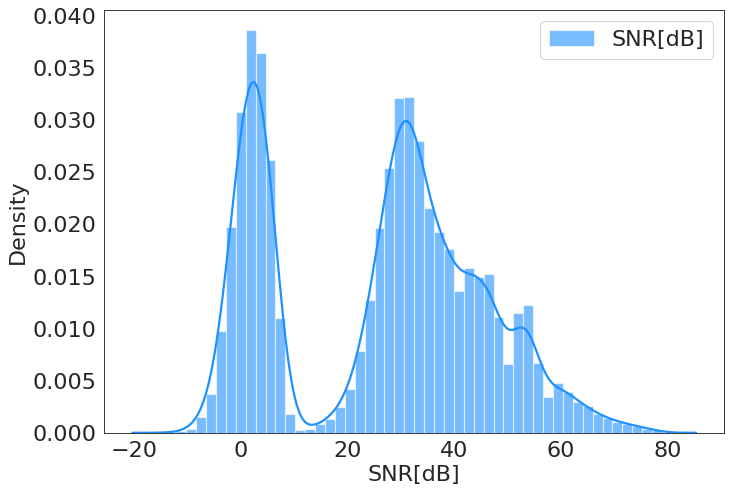

In [12]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df["SNR[dB]"], color="dodgerblue", label="SNR[dB]", **kwargs)
plt.legend()

In [13]:
df["ChannelState"].value_counts(normalize = True)

NLOSv   0.42
NLOS    0.33
LOS     0.24
Name: ChannelState, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


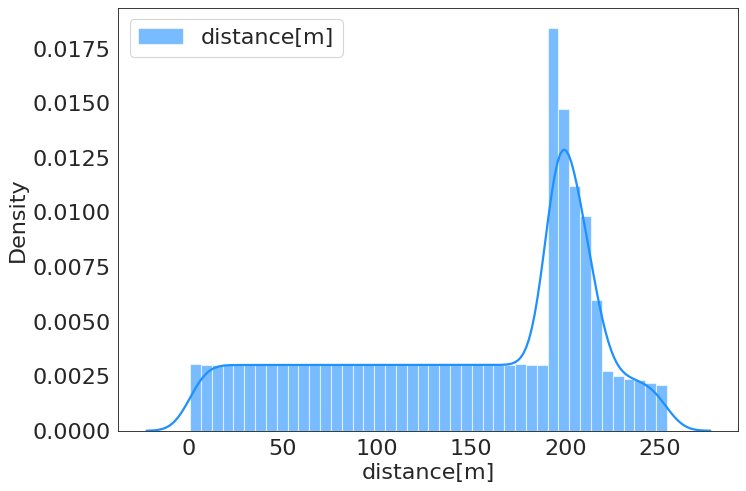

In [14]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df["distance[m]"], color="dodgerblue", label="distance[m]", **kwargs)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


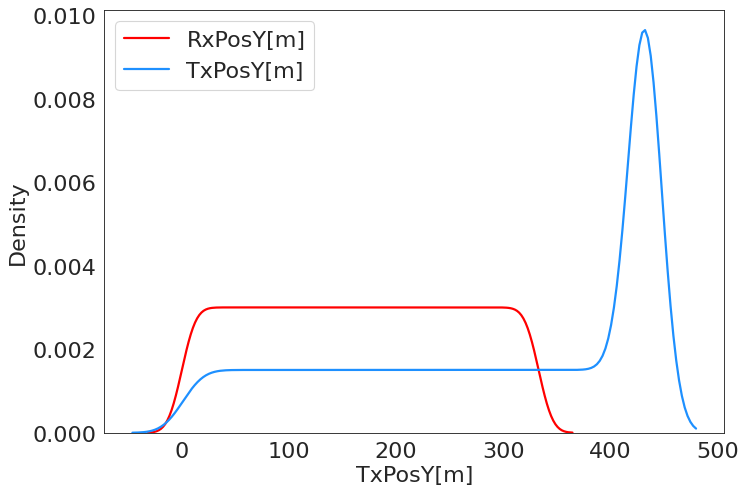

In [15]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df["RxPosY[m]"], color="red", label="RxPosY[m]", **kwargs, hist = False)
sns.distplot(df["TxPosY[m]"], color="dodgerblue", label="TxPosY[m]", **kwargs, hist = False)
plt.legend()

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["ChannelState"].unique())
df["ChannelState"] = le.transform(df["ChannelState"])
df

,TxPosX[m],TxPosY[m],RxPosX[m],RxPosY[m],ChannelState,SNR[dB],Pathloss[dB],frequency[Ghz],distance[m],TxSpeed[km/h],RxSpeed[km/h]
0,250.00,1.00,250,0.00,0,78.10,65.76,30.40,1.00,59.86,30.00
1,250.00,1.17,250,0.08,0,77.42,66.34,30.40,1.08,59.86,30.00
2,250.00,1.33,250,0.17,0,74.24,66.87,30.40,1.17,59.86,30.00
3,250.00,1.50,250,0.25,0,75.90,67.37,30.40,1.25,59.86,30.00
4,250.00,1.67,250,0.33,0,72.88,67.84,30.40,1.33,59.86,30.00
...,...,...,...,...,...,...,...,...,...,...,...
63995,17.17,433.00,250,332.92,1,-1.45,137.88,33.89,253.43,60.01,29.88
63996,17.00,433.00,250,333.00,1,3.56,137.89,33.89,253.55,60.01,29.88
63997,16.83,433.00,250,333.08,1,0.73,137.90,33.89,253.67,59.98,30.24
63998,16.67,433.00,250,333.17,1,-1.16,137.90,33.89,253.79,60.01,29.88


In [17]:
import sklearn
scaler_in = sklearn.preprocessing.StandardScaler()
scaler_in.fit(df.drop(columns = ["SNR[dB]", "Pathloss[dB]"]))

StandardScaler()

In [18]:
data = pd.DataFrame(scaler_in.transform(df.drop(columns = ["SNR[dB]", "Pathloss[dB]"])))

In [19]:
def reset_data(data, target):
  co = list(data.columns)
  # co.remove(["SNR[dB]", "Pathloss[dB]", "frequency[Ghz]"])
  co.remove("SNR[dB]")
  co.remove("Pathloss[dB]")
  print(co)
  for i, c in enumerate(co):
    target.rename(columns = {i: c}, inplace = True)
reset_data(df, data)
data

['TxPosX[m]', 'TxPosY[m]', 'RxPosX[m]', 'RxPosY[m]', 'ChannelState', 'frequency[Ghz]', 'distance[m]', 'TxSpeed[km/h]', 'RxSpeed[km/h]']


,TxPosX[m],TxPosY[m],RxPosX[m],RxPosY[m],ChannelState,frequency[Ghz],distance[m],TxSpeed[km/h],RxSpeed[km/h]
0,0.60,-2.03,0.00,-1.73,-1.48,-1.78,-2.04,-0.32,-0.00
1,0.60,-2.02,0.00,-1.73,-1.48,-1.78,-2.04,-0.32,0.00
2,0.60,-2.02,0.00,-1.73,-1.48,-1.78,-2.03,-0.29,-0.00
3,0.60,-2.02,0.00,-1.73,-1.48,-1.78,-2.03,-0.32,-0.00
4,0.60,-2.02,0.00,-1.73,-1.48,-1.78,-2.03,-0.32,0.00
...,...,...,...,...,...,...,...,...,...
63980,-2.80,0.97,0.00,1.73,-0.22,1.52,1.56,0.66,-0.84
63981,-2.81,0.97,0.00,1.73,-0.22,1.52,1.56,0.66,-0.84
63982,-2.81,0.97,0.00,1.73,-0.22,1.52,1.56,0.43,1.69
63983,-2.81,0.97,0.00,1.73,-0.22,1.52,1.56,0.66,-0.84


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 data, df["Pathloss[dB]"], test_size=0.33, random_state=40)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_test

,TxPosX[m],TxPosY[m],RxPosX[m],RxPosY[m],ChannelState,frequency[Ghz],distance[m],TxSpeed[km/h],RxSpeed[km/h]
3804,-2.34,0.97,0.00,1.56,-0.22,-1.78,1.25,0.66,-0.84
15805,-2.35,0.97,0.00,1.57,-0.22,-0.99,1.26,0.43,1.69
34849,-0.03,0.97,0.00,0.74,-0.22,0.26,0.79,-0.97,1.69
8070,0.60,-1.94,0.00,-1.67,-1.48,-1.22,-1.95,-0.27,-0.01
8251,0.60,-1.73,0.00,-1.51,-1.48,-1.22,-1.74,-0.27,0.17
...,...,...,...,...,...,...,...,...,...
29431,0.60,-0.36,0.00,-0.49,1.03,-0.05,-0.34,-0.97,1.69
12763,0.60,-1.14,0.00,-1.07,1.03,-0.99,-1.13,-0.97,0.17
44152,0.60,-1.84,0.00,-1.59,-1.48,0.76,-1.84,-0.27,0.17
40092,0.60,-1.91,0.00,-1.64,-1.48,0.63,-1.92,-0.27,-0.01


In [21]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(hidden_layer_sizes = (10), random_state = 42, max_iter = 300, activation = "tanh")

In [22]:
import time
durations = {}

In [23]:
start = time.time()
clf.fit(X_train, y_train)
durations["MLP"] = time.time() - start

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [24]:
clf.score(X_test, y_test)

0.9985039024212643

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [26]:
knn.score(X_test, y_test)

0.9986937073381216

In [27]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(
 data, df["SNR[dB]"], test_size=0.33, random_state=42)
x_train2 = pd.DataFrame(x_train2)
x_test2 = pd.DataFrame(x_test2)

In [28]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
start = time.time()
RF.fit(x_train2, y_train2)
durations["RF"] = time.time() - start

In [29]:
RF.score(x_test2, y_test2)

0.9638131985677354

In [30]:
KNN = KNeighborsRegressor(n_neighbors = 4)
start = time.time()
KNN.fit(x_train2, y_train2)
durations["KNN"] = time.time() - start

In [31]:
KNN.score(x_test2, y_test2)

0.9622430878790247

In [32]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(hidden_layer_sizes = (20, 10, 10, 5), random_state = 42, max_iter = 300, activation = "tanh")
start = time.time()
clf.fit(x_train2, y_train2)
durations["MLP"] = time.time() - start

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [33]:
clf.score(x_test2, y_test2)

0.9678972472821465

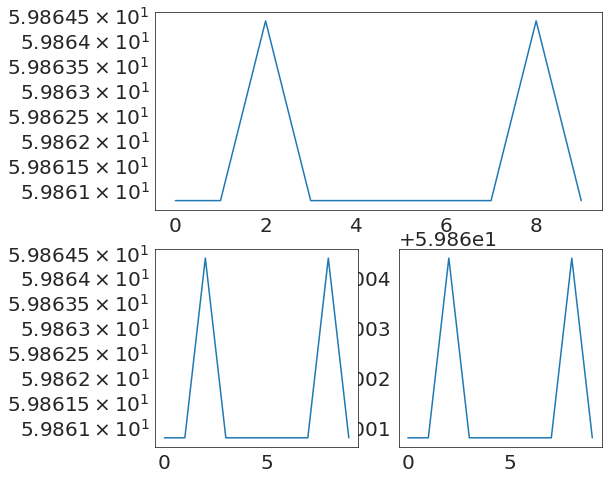

In [34]:
plt.figure(figsize = (8, 8))
plt.subplot(2,1,1)
plt.plot(df["TxSpeed[km/h]"][:10].index, df["TxSpeed[km/h]"][:10])
plt.yscale("log")
# plt.xscale("log")
plt.subplot(224)
plt.plot(df["TxSpeed[km/h]"][:10].index, df["TxSpeed[km/h]"][:10])
# plt.yscale("log")
plt.subplot(223)
plt.plot(df["TxSpeed[km/h]"][:10].index, df["TxSpeed[km/h]"][:10])
plt.yscale("log")

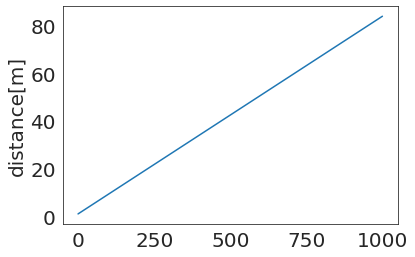

In [35]:
sns.lineplot(data = df[:1000], x = df[:1000].index, y = "distance[m]")

In [36]:
from sklearn.utils.validation import column_or_1d
tt = x_test2[:300].reset_index(drop = True)
tt["SNR[dB]"] = pd.DataFrame(y_test2[:300]).reset_index(drop = True)["SNR[dB]"]
# plt.figure(figsize = (12, 8))
# plt.scatter(tt.index, y_test2[:])
# plt.plot(tt.index, KNN.predict(tt.drop(columns = ["SNR[dB]"])), color = "r")

In [37]:
tt.sort_values(by = 'SNR[dB]', ascending = True, inplace = True)
tt.reset_index(drop = True, inplace = True)

In [38]:
tt

,TxPosX[m],TxPosY[m],RxPosX[m],RxPosY[m],ChannelState,frequency[Ghz],distance[m],TxSpeed[km/h],RxSpeed[km/h],SNR[dB]
0,-2.65,0.97,0.00,1.68,-0.22,1.31,1.45,0.43,1.69,-7.49
1,-2.66,0.97,0.00,1.68,-0.22,-0.46,1.46,0.66,-0.84,-6.92
2,-2.13,0.97,0.00,1.49,-0.22,-0.99,1.13,0.66,-0.84,-6.29
3,-2.73,0.97,0.00,1.70,-0.22,-0.46,1.51,0.43,1.69,-5.69
4,-1.53,0.97,0.00,1.28,-0.22,-0.73,0.86,-0.97,1.69,-4.37
...,...,...,...,...,...,...,...,...,...,...
295,0.60,-1.90,0.00,-1.63,-1.48,1.52,-1.91,-0.50,0.02,60.72
296,0.60,-1.93,0.00,-1.66,-1.48,0.63,-1.94,-0.50,-0.01,62.78
297,0.60,-1.98,0.00,-1.70,-1.48,-1.48,-1.99,-0.29,0.02,66.42
298,0.60,-1.98,0.00,-1.70,-1.48,0.47,-2.00,-0.32,-0.01,66.45


In [39]:
tt.drop(tt[tt["SNR[dB]"] < 35].index, inplace=True)

In [40]:
tt.count()

TxPosX[m]         106
TxPosY[m]         106
RxPosX[m]         106
RxPosY[m]         106
ChannelState      106
frequency[Ghz]    106
distance[m]       106
TxSpeed[km/h]     106
RxSpeed[km/h]     106
SNR[dB]           106
dtype: int64

In [41]:
tt.reset_index(drop=True, inplace=True)

In [42]:
def show_model_performances(models, tt):
  test_durations = {}
  for i in models.keys():
    plt.figure(figsize = (12, 8))
    plt.scatter(tt.index, tt["SNR[dB]"], label = "Real data")
    start = time.time()
    plt.plot(tt.index, i.predict(tt.drop(columns = ["SNR[dB]"])), color = "r", label=models[i])
    plt.xlabel("Index")
    plt.ylabel("SNR[dB]")
    test_durations[models[i]] = time.time() - start
    plt.title(models[i])
    plt.grid(color="gray" , linestyle="--")
    plt.legend()
    plt.savefig("/gdrive/MyDrive/Colab Notebooks/Parvin/" + str(models[i]) + ".png")
  print("All in one graph comparison:")
  plt.figure(figsize = (16, 12))
  plt.scatter(tt.index, tt["SNR[dB]"], label = "Real data")
  c = ["r", "g", "b"]
  for i, m in enumerate(models.keys()):
    plt.plot(tt.index, m.predict(tt.drop(columns = ["SNR[dB]"])), color = c[i], label = models[m])
  plt.xlabel("index")
  plt.ylabel("SNR[dB]")
  plt.grid(color="gray" , linestyle="--")
  plt.legend()
  plt.savefig("/gdrive/MyDrive/Colab Notebooks/Parvin/3.png")
  return test_durations

In [43]:
models = {KNN: "KNN", clf: "Neural Network", RF: "Random Forrest"}

All in one graph comparison:
Train time: {'MLP': 55.826109409332275, 'RF': 11.99595022201538, 'KNN': 0.05800485610961914}
Test time: {'KNN': 0.0051267147064208984, 'Neural Network': 0.0026941299438476562, 'Random Forrest': 0.016598224639892578}


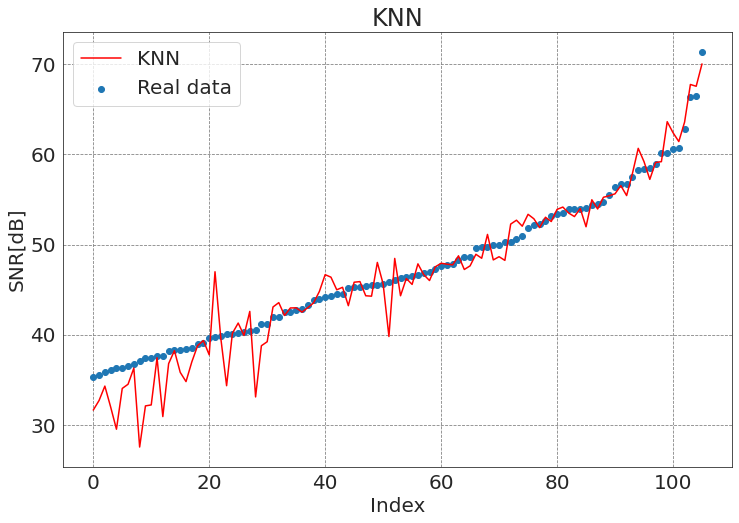

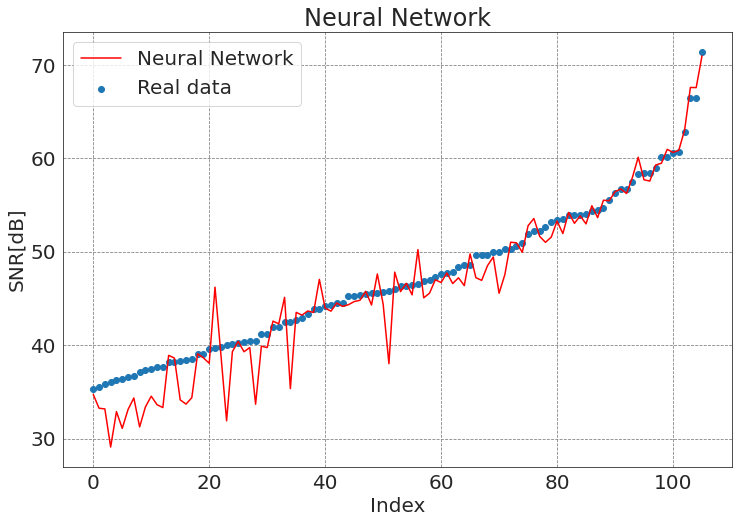

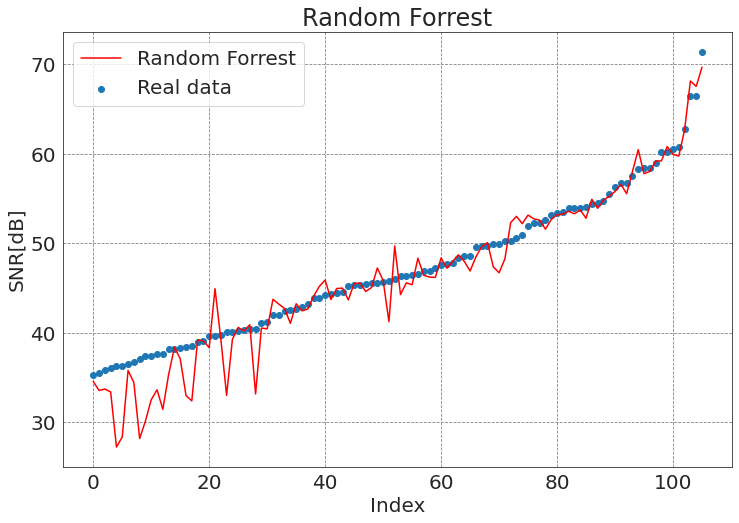

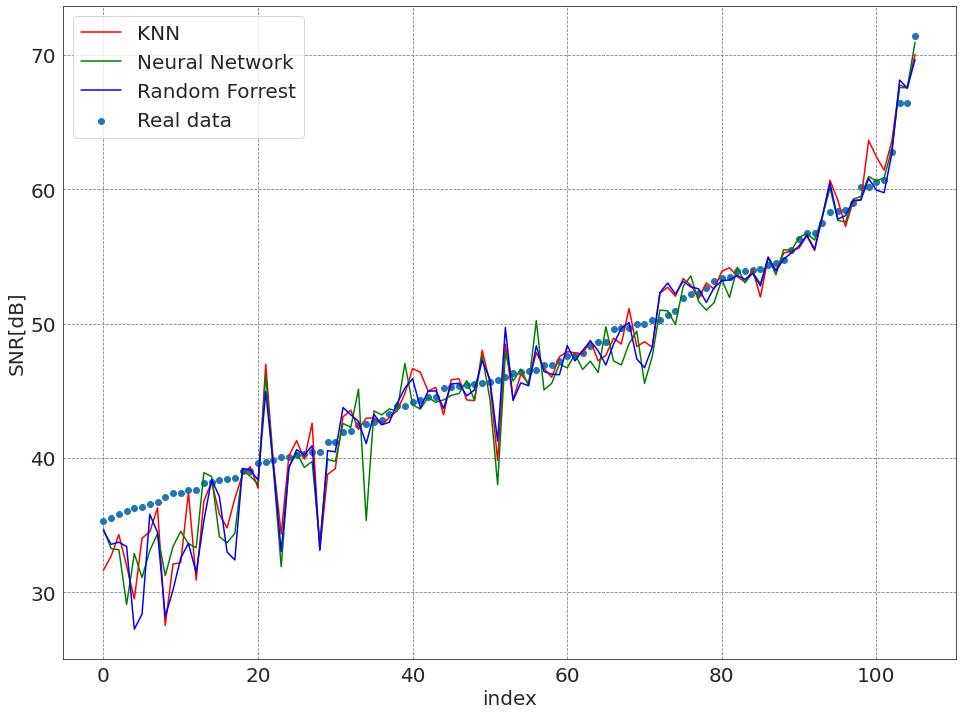

In [44]:
test_durations = show_model_performances(models, tt)
print("Train time: " + str(durations) + "\nTest time: " + str(test_durations))

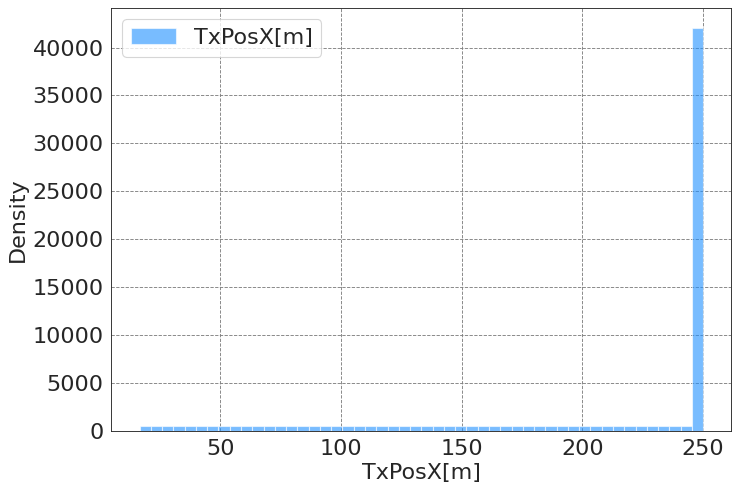

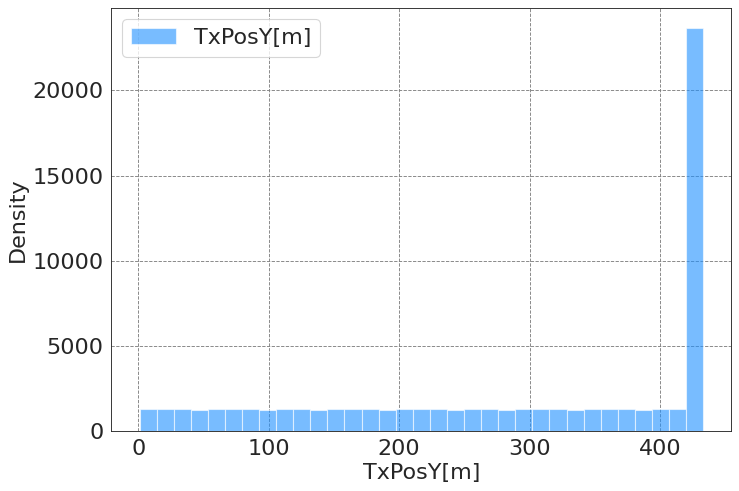

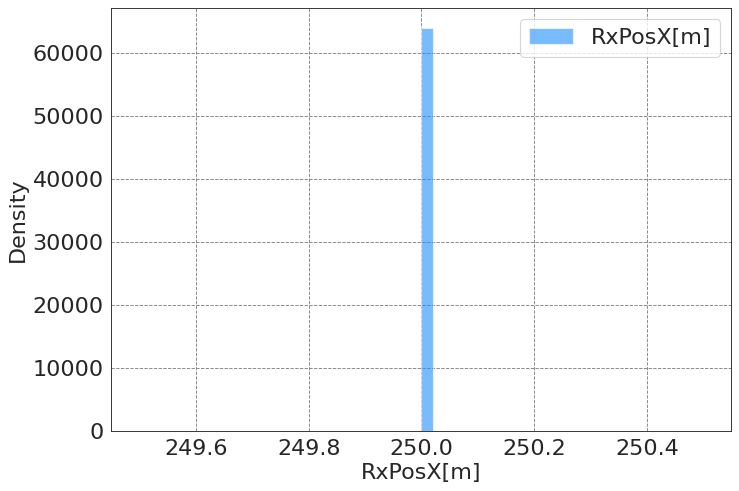

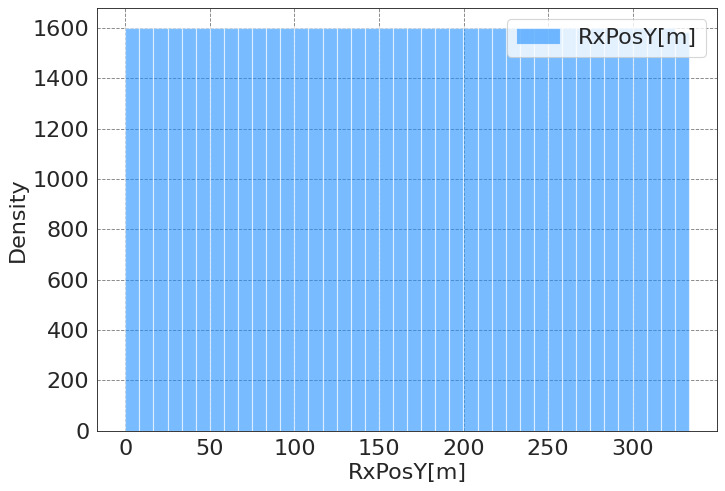

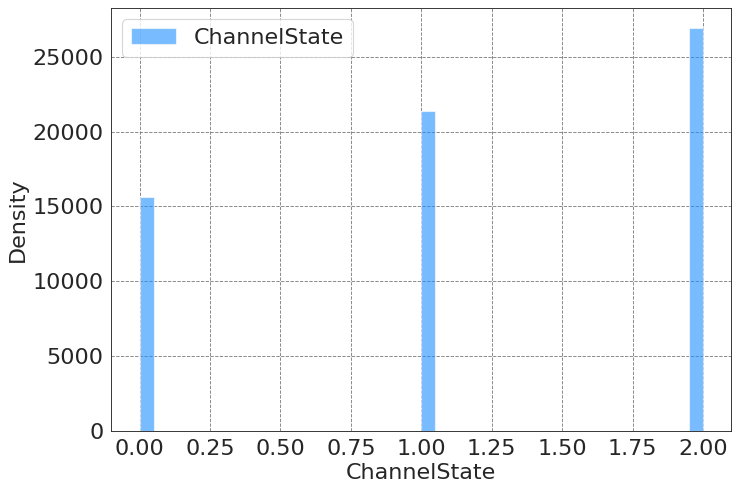

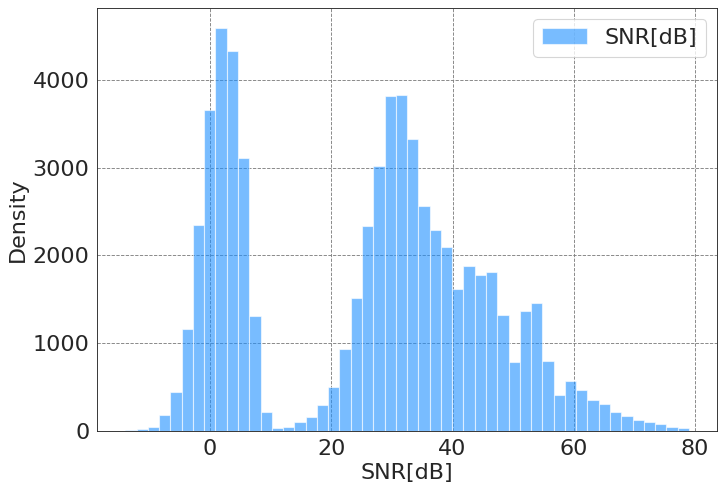

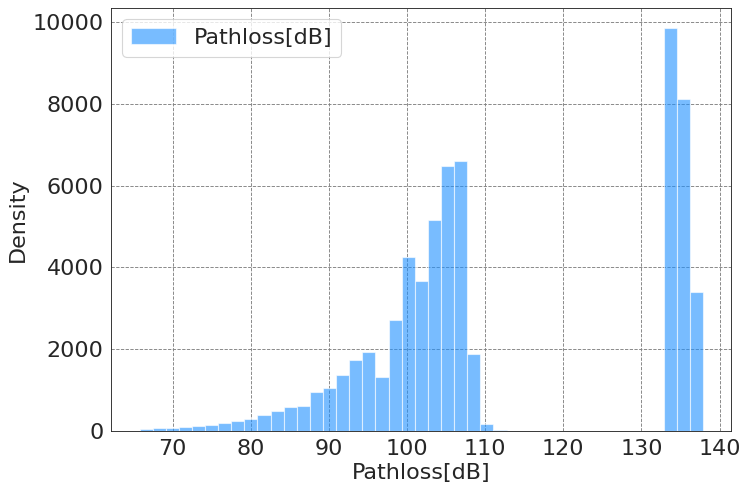

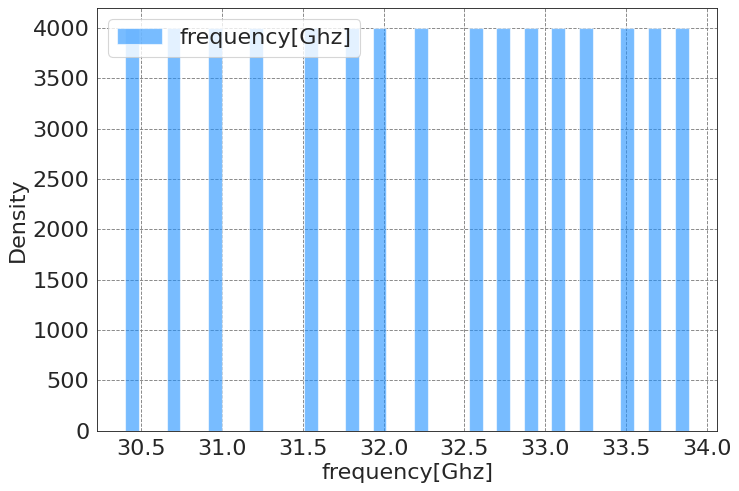

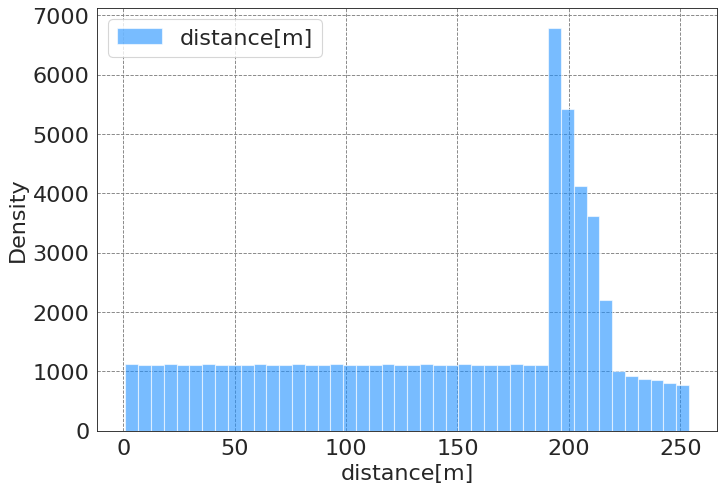

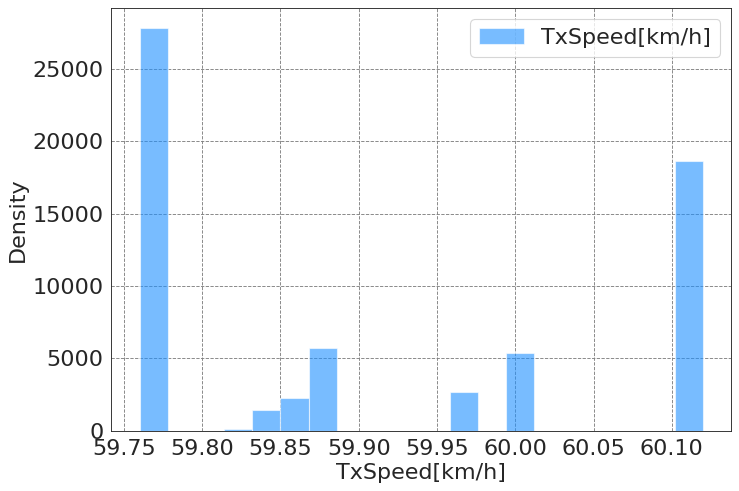

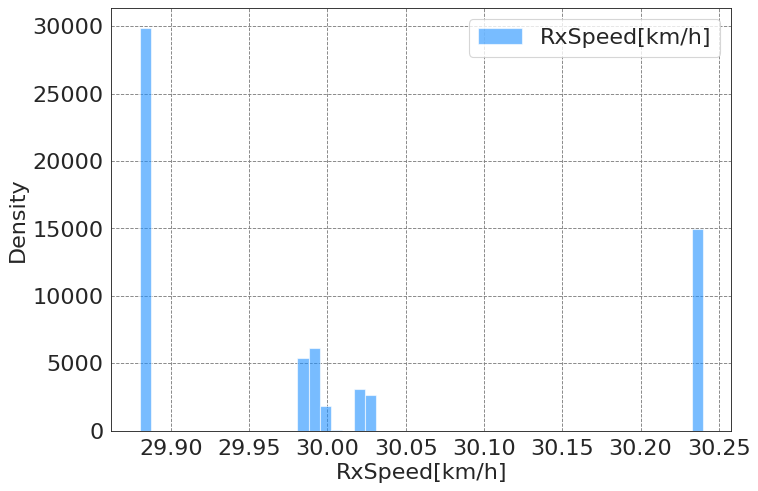

In [46]:
def show_density(columns):
  for i in columns:
    plt.figure(figsize=(10,7), dpi= 80)
    sns.distplot(df[str(i)], color="dodgerblue", label=str(i), **kwargs, kde=False)
    plt.ylabel("Density")
    plt.grid(color="gray" , linestyle="--")
    plt.legend()
    # plt.savefig("/gdrive/MyDrive/Colab Notebooks/Parvin/plot archive/" + str(i) + ".png")
show_density(df.columns)

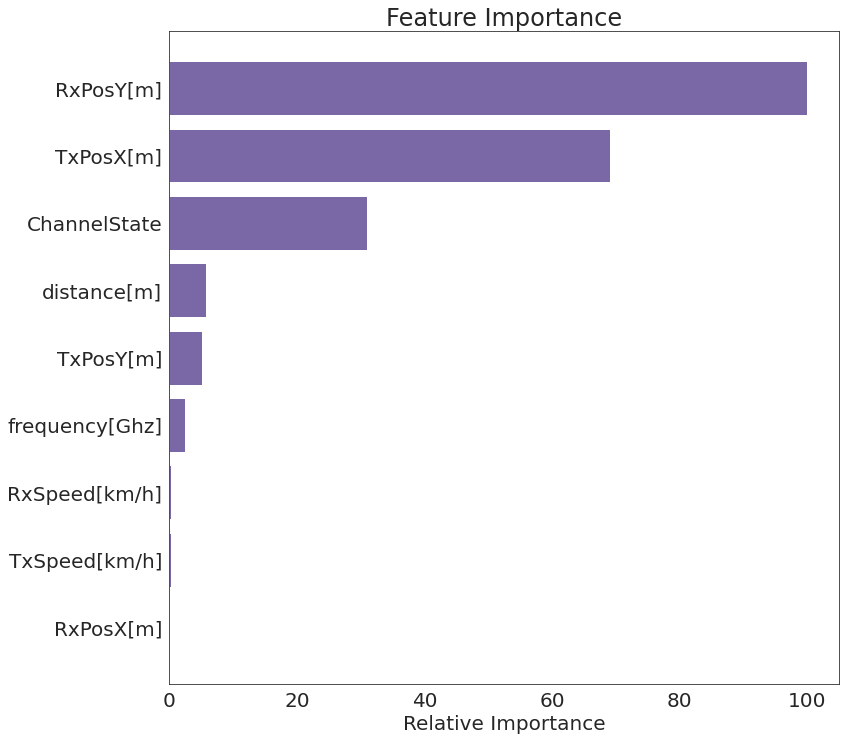

In [47]:
def showFeatureImportance(model):
    #FEATURE IMPORTANCE
    # Get Feature Importance from the classifier
    feature_importance = model.feature_importances_

    # Normalize The Features
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    #plot relative feature importance
    plt.figure(figsize=(12, 12))
    plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
    plt.yticks(pos, np.asanyarray(x_train2.columns)[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Feature Importance')
    plt.show()
showFeatureImportance(RF)